In [109]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
dat = pickle.load(open("extracted_files/extracted_raw.p", "rb"))
dat = list(filter(None, dat))
df = pd.DataFrame(dat)

In [111]:
df.columns

Index(['abstract', 'authors', 'cite_count', 'cover_date', 'doi', 'keywords',
       'publication_name', 'reference_count', 'subject_area', 'title', 'type',
       'volume'],
      dtype='object')

In [112]:
abstracts = " ".join(list(df.abstract))

In [113]:
abstracts = abstracts.lower()

In [114]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [115]:
words = word_tokenize(abstracts)

In [117]:
words

['©',
 '2017',
 'elsevier',
 'ltd',
 'a',
 'comprehensive',
 'public',
 'health',
 'strategy',
 'for',
 'adolescent',
 'suicide',
 'prevention',
 'includes',
 'upstream',
 'prevention',
 'strategies',
 ',',
 'strategies',
 'for',
 'risk',
 'recognition',
 ',',
 'and',
 'services',
 'for',
 'those',
 'at',
 'risk',
 '.',
 'interpersonal',
 'trauma',
 'and',
 'substance',
 'use',
 'are',
 'important',
 'prevention',
 'targets',
 'as',
 'each',
 'is',
 'associated',
 'with',
 'risk',
 'for',
 'suicide',
 'attempts',
 '.',
 'multiple',
 'prevention',
 'programs',
 'target',
 'these',
 'factors',
 ';',
 'however',
 ',',
 'the',
 'family',
 'check-up',
 ',',
 'designed',
 'to',
 'reduce',
 'substance',
 'use',
 'and',
 'behavioral',
 'problems',
 ',',
 'also',
 'has',
 'been',
 'associated',
 'with',
 'reduced',
 'suicide',
 'risk',
 '.',
 'several',
 'youth',
 'screening',
 'instruments',
 'have',
 'shown',
 'utility',
 ',',
 'and',
 'a',
 'large-scale',
 'trial',
 'is',
 'underway',
 'to',

In [118]:
keywords = pickle.load(open("keywords.p", "rb"))

In [119]:
also_keywords = []
for key in keywords:
    also_keywords.append(key.split())

keywords = []
for sublist in also_keywords:
    for item in sublist:
        keywords.append(item.lower())
keywords

['abductive',
 'logic',
 'programming',
 'abductive',
 'reasoning',
 'abstract',
 'data',
 'type',
 'abstraction',
 'accelerating',
 'change',
 'action',
 'language',
 'action',
 'model',
 'learning',
 'action',
 'selection',
 'adaptive',
 'algorithm',
 'adaptive',
 'neuro',
 'fuzzy',
 'inference',
 'system',
 'admissible',
 'heuristic',
 'affective',
 'computing',
 'agent',
 'architecture',
 'ai',
 'accelerator',
 'ai-complete',
 'algorithm',
 'algorithmic',
 'efficiency',
 'algorithmic',
 'probability',
 'alphago',
 'ambient',
 'intelligence',
 'analysis',
 'of',
 'algorithms',
 'answer',
 'set',
 'programming',
 'anytime',
 'algorithm',
 'application',
 'programming',
 'interface',
 'approximate',
 'string',
 'matching',
 'approximation',
 'error',
 'argumentation',
 'framework',
 'artificial',
 'immune',
 'system',
 'artificial',
 'intelligence',
 'artificial',
 'intelligence',
 'markup',
 'language',
 'artificial',
 'neural',
 'network',
 'association',
 'for',
 'the',
 'advanceme

In [120]:
key_dict = {}
for key in keywords:
    for word in words:
        if word.lower() == key.lower():
            if key in key_dict.keys():
                key_dict[key] += 1
            else:
                key_dict[key] = 1

In [121]:
key_dict

{'abstract': 12,
 'abstraction': 4,
 'accelerating': 2,
 'accelerator': 2,
 'acquisition': 22,
 'action': 84,
 'adaptive': 138,
 'admissible': 2,
 'advancement': 7,
 'agent': 99,
 'ai': 117,
 'algorithm': 5418,
 'algorithmic': 22,
 'algorithms': 366,
 'alphago': 3,
 'ambient': 16,
 'amplification': 1,
 'analysis': 1107,
 'and': 11298,
 'annealing': 7,
 'answer': 8,
 'anytime': 1,
 'application': 149,
 'approach': 418,
 'approximate': 13,
 'approximation': 20,
 'architecture': 82,
 'argumentation': 11,
 'artificial': 2754,
 'assistant': 4,
 'association': 37,
 'asymptotic': 2,
 'augmented': 5,
 'automata': 9,
 'automated': 54,
 'autonomic': 1,
 'autonomous': 44,
 'averaging': 5,
 'backpropagation': 3,
 'backward': 1,
 'batch': 9,
 'bayesian': 32,
 'bees': 3,
 'behavior': 158,
 'big': 104,
 'binary': 36,
 'binding': 1,
 'bio-inspired': 7,
 'blue': 8,
 'boolean': 16,
 'boundary': 19,
 'brain': 29,
 'branching': 6,
 'brute-force': 1,
 'calculus': 12,
 'car': 5,
 'carlo': 6,
 'case-based': 

In [122]:
import operator
# x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_x = sorted(key_dict.items(), key=operator.itemgetter(1))

In [123]:
for_plotting = sorted_x[-15:]

In [124]:
for_plotting

[('problem', 1668),
 ('optimization', 1692),
 ('computational', 1988),
 ('model', 2052),
 ('for', 2084),
 ('intelligence', 2590),
 ('artificial', 2754),
 ('network', 2888),
 ('algorithm', 5418),
 ('learning', 6258),
 ('system', 8138),
 ('data', 8352),
 ('and', 11298),
 ('the', 12384),
 ('of', 38465)]

In [125]:
to_remove = "of,the,and,for,a,i,in,an"
to_remove = to_remove.split(",")
to_remove

['of', 'the', 'and', 'for', 'a', 'i', 'in', 'an']

In [126]:
# for i, val in enumerate(for_plotting):
#     print(i,val)
#     if key in to_remove:
i = 0
while 1:
    if for_plotting[i][0] in to_remove:
        del for_plotting[i]
    else:
        i += 1
    if i >= len(for_plotting):
        break

In [127]:
for_plotting

[('problem', 1668),
 ('optimization', 1692),
 ('computational', 1988),
 ('model', 2052),
 ('intelligence', 2590),
 ('artificial', 2754),
 ('network', 2888),
 ('algorithm', 5418),
 ('learning', 6258),
 ('system', 8138),
 ('data', 8352)]

In [130]:
x = []
y = []
for val in for_plotting:
    x.append(val[0])
    y.append(val[1])
pickle.dump([x,y], open("for_plotting.p", "wb"))

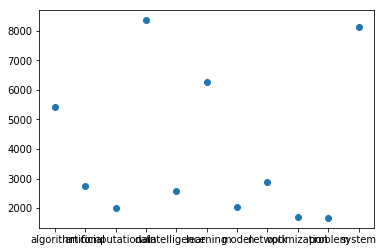

In [129]:
plt.scatter(x,y)
plt.show()